In [117]:
import twint

In [118]:
# Set up TWINT config
c = twint.Config()

In [119]:
# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
nest_asyncio.apply()

In [120]:
c.Search = "COVID19"
# Custom output format
c.Format = "Username: {username} |  Tweet: {tweet}"
c.Limit = 1
c.Pandas = True
c.Lang = "en"
twint.run.Search(c)

Username: abdulhniazi |  Tweet: Gratitude for our #FrontLineHeroes! #COVID19  pic.twitter.com/vBlpXeFLzu
Username: indiaonthe_move |  Tweet: Ok. The PTI govt in Pakistan bowed down before the religious figures  & conceded to their demand to keep mosques open during Ramadan despite the threat of the #Covid19 #Pandemic looming large https://twitter.com/a_liraza/status/1254045190911754240 …
Username: foreverfine4u |  Tweet: This is the same company tried to sell medicine for Ebola ,fail big time ,now trying same drug for covid19 ,are we in fish market ,if not this then other will work .
Username: bromalley |  Tweet: @TIME @abigailabrams has a fantastically well-researched piece on the impact of #COVID19 on people with disabilities. “The policies are actually serving to take away the community resources that exist at the exact time we need them most,” O’Malley says.   https://time.com/5826098/coronavirus-people-with-disabilities/?fbclid=IwAR2je6b477KppoBEFvttaoIfozOSSZ1WfYHSF4Fc3v8ipq9HonX

In [121]:
def available_columns():
    return twint.output.panda.Tweets_df.columns

In [122]:
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

In [123]:
available_columns()

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'hashtags', 'cashtags', 'user_id', 'user_id_str', 'username',
       'name', 'day', 'hour', 'link', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [124]:
df_pd = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes"])

In [125]:
df_pd.head(10)

,date,username,tweet,hashtags,nlikes
0,2020-04-25 23:54:28,abdulhniazi,Gratitude for our #FrontLineHeroes!\n#COVID19 ...,"[#frontlineheroes, #covid19]",0
1,2020-04-25 23:54:27,indiaonthe_move,Ok. The PTI govt in Pakistan bowed down before...,"[#covid19, #pandemic]",0
2,2020-04-25 23:54:27,foreverfine4u,This is the same company tried to sell medicin...,[],0
3,2020-04-25 23:54:25,bromalley,@TIME @abigailabrams has a fantastically well-...,[#covid19],0
4,2020-04-25 23:54:25,rosemhook,"POTUS told this lie 2 months ago, before telli...",[],0
5,2020-04-25 23:54:25,Mhudak,Thanks to all of our friends and neighbors for...,"[#alonetogether, #covid19, #helpinghands]",0
6,2020-04-25 23:54:24,LifespanSC,Thank you citysantacruz for this wonderful gra...,"[#stayhome, #stayhealthy, #covıd19]",0
7,2020-04-25 23:54:23,outburstindia,Who were Modi's best friends amongst Head of t...,"[#lockdown, #covid19, #xijinping, #sars_cov_2]",0
8,2020-04-25 23:54:22,sonika_khambra,A1) False\n\n#COVID19 #contest #NovaDairy #Be...,"[#covid19, #contest, #novadairy, #beawaretobew...",0
9,2020-04-25 23:54:22,KlimaMin,#RenewableEnergy and #EnergyEfficiency plays a...,"[#renewableenergy, #energyefficiency, #greenre...",0


In [126]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [127]:
#removing punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df_pd["tidy_tweet"] = df_pd ["tweet"].apply(lambda x: remove_punct(x))
df_pd.head(10)

/Users/abhishekdas/opt/anaconda3/envs/env2/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,date,username,tweet,hashtags,nlikes,tidy_tweet
0,2020-04-25 23:54:28,abdulhniazi,Gratitude for our #FrontLineHeroes!\n#COVID19 ...,"[#frontlineheroes, #covid19]",0,Gratitude for our FrontLineHeroes\nCOVID pict...
1,2020-04-25 23:54:27,indiaonthe_move,Ok. The PTI govt in Pakistan bowed down before...,"[#covid19, #pandemic]",0,Ok The PTI govt in Pakistan bowed down before ...
2,2020-04-25 23:54:27,foreverfine4u,This is the same company tried to sell medicin...,[],0,This is the same company tried to sell medicin...
3,2020-04-25 23:54:25,bromalley,@TIME @abigailabrams has a fantastically well-...,[#covid19],0,TIME abigailabrams has a fantastically wellres...
4,2020-04-25 23:54:25,rosemhook,"POTUS told this lie 2 months ago, before telli...",[],0,POTUS told this lie months ago before telling...
5,2020-04-25 23:54:25,Mhudak,Thanks to all of our friends and neighbors for...,"[#alonetogether, #covid19, #helpinghands]",0,Thanks to all of our friends and neighbors for...
6,2020-04-25 23:54:24,LifespanSC,Thank you citysantacruz for this wonderful gra...,"[#stayhome, #stayhealthy, #covıd19]",0,Thank you citysantacruz for this wonderful gra...
7,2020-04-25 23:54:23,outburstindia,Who were Modi's best friends amongst Head of t...,"[#lockdown, #covid19, #xijinping, #sars_cov_2]",0,Who were Modis best friends amongst Head of th...
8,2020-04-25 23:54:22,sonika_khambra,A1) False\n\n#COVID19 #contest #NovaDairy #Be...,"[#covid19, #contest, #novadairy, #beawaretobew...",0,A False\n\nCOVID contest NovaDairy BeAwareToB...
9,2020-04-25 23:54:22,KlimaMin,#RenewableEnergy and #EnergyEfficiency plays a...,"[#renewableenergy, #energyefficiency, #greenre...",0,RenewableEnergy and EnergyEfficiency plays a k...


In [128]:
#removing tweets with empty text
df_pd = df_pd[df_pd["tidy_tweet"]!='']
df_pd.head()


,date,username,tweet,hashtags,nlikes,tidy_tweet
0,2020-04-25 23:54:28,abdulhniazi,Gratitude for our #FrontLineHeroes!\n#COVID19 ...,"[#frontlineheroes, #covid19]",0,Gratitude for our FrontLineHeroes\nCOVID pict...
1,2020-04-25 23:54:27,indiaonthe_move,Ok. The PTI govt in Pakistan bowed down before...,"[#covid19, #pandemic]",0,Ok The PTI govt in Pakistan bowed down before ...
2,2020-04-25 23:54:27,foreverfine4u,This is the same company tried to sell medicin...,[],0,This is the same company tried to sell medicin...
3,2020-04-25 23:54:25,bromalley,@TIME @abigailabrams has a fantastically well-...,[#covid19],0,TIME abigailabrams has a fantastically wellres...
4,2020-04-25 23:54:25,rosemhook,"POTUS told this lie 2 months ago, before telli...",[],0,POTUS told this lie months ago before telling...


In [129]:
#dropping duplicate rows
df_pd.drop_duplicates(subset=["tidy_tweet"], keep=False)
df_pd.head(10)

,date,username,tweet,hashtags,nlikes,tidy_tweet
0,2020-04-25 23:54:28,abdulhniazi,Gratitude for our #FrontLineHeroes!\n#COVID19 ...,"[#frontlineheroes, #covid19]",0,Gratitude for our FrontLineHeroes\nCOVID pict...
1,2020-04-25 23:54:27,indiaonthe_move,Ok. The PTI govt in Pakistan bowed down before...,"[#covid19, #pandemic]",0,Ok The PTI govt in Pakistan bowed down before ...
2,2020-04-25 23:54:27,foreverfine4u,This is the same company tried to sell medicin...,[],0,This is the same company tried to sell medicin...
3,2020-04-25 23:54:25,bromalley,@TIME @abigailabrams has a fantastically well-...,[#covid19],0,TIME abigailabrams has a fantastically wellres...
4,2020-04-25 23:54:25,rosemhook,"POTUS told this lie 2 months ago, before telli...",[],0,POTUS told this lie months ago before telling...
5,2020-04-25 23:54:25,Mhudak,Thanks to all of our friends and neighbors for...,"[#alonetogether, #covid19, #helpinghands]",0,Thanks to all of our friends and neighbors for...
6,2020-04-25 23:54:24,LifespanSC,Thank you citysantacruz for this wonderful gra...,"[#stayhome, #stayhealthy, #covıd19]",0,Thank you citysantacruz for this wonderful gra...
7,2020-04-25 23:54:23,outburstindia,Who were Modi's best friends amongst Head of t...,"[#lockdown, #covid19, #xijinping, #sars_cov_2]",0,Who were Modis best friends amongst Head of th...
8,2020-04-25 23:54:22,sonika_khambra,A1) False\n\n#COVID19 #contest #NovaDairy #Be...,"[#covid19, #contest, #novadairy, #beawaretobew...",0,A False\n\nCOVID contest NovaDairy BeAwareToB...
9,2020-04-25 23:54:22,KlimaMin,#RenewableEnergy and #EnergyEfficiency plays a...,"[#renewableenergy, #energyefficiency, #greenre...",0,RenewableEnergy and EnergyEfficiency plays a k...


In [130]:
#resetting index
df_pd = df_pd.reset_index(drop=True)
df_pd.head()

,date,username,tweet,hashtags,nlikes,tidy_tweet
0,2020-04-25 23:54:28,abdulhniazi,Gratitude for our #FrontLineHeroes!\n#COVID19 ...,"[#frontlineheroes, #covid19]",0,Gratitude for our FrontLineHeroes\nCOVID pict...
1,2020-04-25 23:54:27,indiaonthe_move,Ok. The PTI govt in Pakistan bowed down before...,"[#covid19, #pandemic]",0,Ok The PTI govt in Pakistan bowed down before ...
2,2020-04-25 23:54:27,foreverfine4u,This is the same company tried to sell medicin...,[],0,This is the same company tried to sell medicin...
3,2020-04-25 23:54:25,bromalley,@TIME @abigailabrams has a fantastically well-...,[#covid19],0,TIME abigailabrams has a fantastically wellres...
4,2020-04-25 23:54:25,rosemhook,"POTUS told this lie 2 months ago, before telli...",[],0,POTUS told this lie months ago before telling...


In [141]:
# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
nltk.download('stopwords')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhishekdas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [142]:
stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in df_pd.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.tidy_tweet.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
df_pd["tidy_tweet"] = cleaned_tweets
df_pd.head(10)


,date,username,tweet,hashtags,nlikes,tidy_tweet,key_phrases
0,2020-04-25 23:54:28,abdulhniazi,Gratitude for our #FrontLineHeroes!\n#COVID19 ...,"[#frontlineheroes, #covid19]",0,Gratitude FrontLineHeroes COVID pictwittercomv...,[gratitude frontlineheroes covid pictwittercom...
1,2020-04-25 23:54:27,indiaonthe_move,Ok. The PTI govt in Pakistan bowed down before...,"[#covid19, #pandemic]",0,Ok The PTI govt Pakistan bowed religious figur...,"[ok pti govt pakistan, religious figure, mosqu..."
2,2020-04-25 23:54:27,foreverfine4u,This is the same company tried to sell medicin...,[],0,This company tried sell medicine Ebola fail bi...,"[medicine ebola, big time, drug covid fish mar..."
3,2020-04-25 23:54:25,bromalley,@TIME @abigailabrams has a fantastically well-...,[#covid19],0,TIME abigailabrams fantastically wellresearche...,"[piece impact covid people disability, communi..."
4,2020-04-25 23:54:25,rosemhook,"POTUS told this lie 2 months ago, before telli...",[],0,POTUS told lie month ago telling Americans yes...,"[bleach cure covid, thankful press, truth http..."
5,2020-04-25 23:54:25,Mhudak,Thanks to all of our friends and neighbors for...,"[#alonetogether, #covid19, #helpinghands]",0,Thanks friend neighbor helping supporting Alon...,"[thanks friend neighbor, alonetogether covid h..."
6,2020-04-25 23:54:24,LifespanSC,Thank you citysantacruz for this wonderful gra...,"[#stayhome, #stayhealthy, #covıd19]",0,Thank citysantacruz wonderful graphic detail m...,[citysantacruz wonderful graphic detail mask r...
7,2020-04-25 23:54:23,outburstindia,Who were Modi's best friends amongst Head of t...,"[#lockdown, #covid19, #xijinping, #sars_cov_2]",0,Who Modis best friend amongst Head Govts World...,"[who modis best friend, head govts world lockd..."
8,2020-04-25 23:54:22,sonika_khambra,A1) False\n\n#COVID19 #contest #NovaDairy #Be...,"[#covid19, #contest, #novadairy, #beawaretobew...",0,A False COVID contest NovaDairy BeAwareToBewar...,[false covid contest novadairy beawaretobeware...
9,2020-04-25 23:54:22,KlimaMin,#RenewableEnergy and #EnergyEfficiency plays a...,"[#renewableenergy, #energyefficiency, #greenre...",0,RenewableEnergy EnergyEfficiency play key role...,"[renewableenergy energyefficiency, key role gl..."


In [143]:
#tokenise cleaned tweets
tokenized_tweet = df_pd["tidy_tweet"].apply(lambda x: x.split())
tokenized_tweet.head(10)

0    [Gratitude, FrontLineHeroes, COVID, pictwitter...
1    [Ok, The, PTI, govt, Pakistan, bowed, religiou...
2    [This, company, tried, sell, medicine, Ebola, ...
3    [TIME, abigailabrams, fantastically, wellresea...
4    [POTUS, told, lie, month, ago, telling, Americ...
5    [Thanks, friend, neighbor, helping, supporting...
6    [Thank, citysantacruz, wonderful, graphic, det...
7    [Who, Modis, best, friend, amongst, Head, Govt...
8    [A, False, COVID, contest, NovaDairy, BeAwareT...
9    [RenewableEnergy, EnergyEfficiency, play, key,...
Name: tidy_tweet, dtype: object

In [144]:
#converting words to lemma
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_tweet.head(10)

0    [Gratitude, FrontLineHeroes, COVID, pictwitter...
1    [Ok, The, PTI, govt, Pakistan, bowed, religiou...
2    [This, company, tried, sell, medicine, Ebola, ...
3    [TIME, abigailabrams, fantastically, wellresea...
4    [POTUS, told, lie, month, ago, telling, Americ...
5    [Thanks, friend, neighbor, helping, supporting...
6    [Thank, citysantacruz, wonderful, graphic, det...
7    [Who, Modis, best, friend, amongst, Head, Govt...
8    [A, False, COVID, contest, NovaDairy, BeAwareT...
9    [RenewableEnergy, EnergyEfficiency, play, key,...
Name: tidy_tweet, dtype: object

In [145]:
#joining all tokens into sentences
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

df_pd["tidy_tweet"] = tokenized_tweet
df_pd.head(10)

,date,username,tweet,hashtags,nlikes,tidy_tweet,key_phrases
0,2020-04-25 23:54:28,abdulhniazi,Gratitude for our #FrontLineHeroes!\n#COVID19 ...,"[#frontlineheroes, #covid19]",0,Gratitude FrontLineHeroes COVID pictwittercomv...,[gratitude frontlineheroes covid pictwittercom...
1,2020-04-25 23:54:27,indiaonthe_move,Ok. The PTI govt in Pakistan bowed down before...,"[#covid19, #pandemic]",0,Ok The PTI govt Pakistan bowed religious figur...,"[ok pti govt pakistan, religious figure, mosqu..."
2,2020-04-25 23:54:27,foreverfine4u,This is the same company tried to sell medicin...,[],0,This company tried sell medicine Ebola fail bi...,"[medicine ebola, big time, drug covid fish mar..."
3,2020-04-25 23:54:25,bromalley,@TIME @abigailabrams has a fantastically well-...,[#covid19],0,TIME abigailabrams fantastically wellresearche...,"[piece impact covid people disability, communi..."
4,2020-04-25 23:54:25,rosemhook,"POTUS told this lie 2 months ago, before telli...",[],0,POTUS told lie month ago telling Americans yes...,"[bleach cure covid, thankful press, truth http..."
5,2020-04-25 23:54:25,Mhudak,Thanks to all of our friends and neighbors for...,"[#alonetogether, #covid19, #helpinghands]",0,Thanks friend neighbor helping supporting Alon...,"[thanks friend neighbor, alonetogether covid h..."
6,2020-04-25 23:54:24,LifespanSC,Thank you citysantacruz for this wonderful gra...,"[#stayhome, #stayhealthy, #covıd19]",0,Thank citysantacruz wonderful graphic detail m...,[citysantacruz wonderful graphic detail mask r...
7,2020-04-25 23:54:23,outburstindia,Who were Modi's best friends amongst Head of t...,"[#lockdown, #covid19, #xijinping, #sars_cov_2]",0,Who Modis best friend amongst Head Govts World...,"[who modis best friend, head govts world lockd..."
8,2020-04-25 23:54:22,sonika_khambra,A1) False\n\n#COVID19 #contest #NovaDairy #Be...,"[#covid19, #contest, #novadairy, #beawaretobew...",0,A False COVID contest NovaDairy BeAwareToBewar...,[false covid contest novadairy beawaretobeware...
9,2020-04-25 23:54:22,KlimaMin,#RenewableEnergy and #EnergyEfficiency plays a...,"[#renewableenergy, #energyefficiency, #greenre...",0,RenewableEnergy EnergyEfficiency play key role...,"[renewableenergy energyefficiency, key role gl..."


In [146]:
# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

In [147]:
#using TextBlob to obtain key phrases
textblob_key_phrases = []
extractor = ConllExtractor()

for index, row in df_pd.iterrows():
    # filerting out all the hashtags
    words_without_hash = [word for word in row.tidy_tweet.split() if '#' not in word.lower()]
    
    hash_removed_sentence = ' '.join(words_without_hash)
    
    blob = TextBlob(hash_removed_sentence, np_extractor=extractor)
    textblob_key_phrases.append(list(blob.noun_phrases))

textblob_key_phrases[:10]

[['gratitude frontlineheroes covid pictwittercomvblpxeflzu'],
 ['ok pti govt pakistan',
  'religious figure',
  'mosque open ramadan',
  'threat covid pandemic'],
 ['medicine ebola', 'big time', 'drug covid fish market work'],
 ['piece impact covid people disability',
  'community resource',
  'exact time need most',
  'o ’ malley',
  'httpstimecomcoronaviruspeoplewithdisabilitiesfbclidiwarjebkppobefvttaoifozosszwfyhsffcvipqhonxvicfwr …'],
 ['bleach cure covid',
  'thankful press',
  'truth httpstwittercomrealdonaldtrumpstatuss … httpstwittercomrealdonaldtrumpstatus …'],
 ['thanks friend neighbor',
  'alonetogether covid helpinghands httpstwittercomusbpchiefbbtstatus …'],
 ['citysantacruz wonderful graphic detail mask requirement',
  'mask reserved health care provider stayhome stayhealthy covıd santa cruz…'],
 ['who modis best friend',
  'head govts world lockdown',
  'india covid realdonaldtrump president usa',
  'president china',
  'what reputation world regard sarscov'],
 ['false 

In [148]:
df_pd["key_phrases"] = textblob_key_phrases
df_pd.head(10)

,date,username,tweet,hashtags,nlikes,tidy_tweet,key_phrases
0,2020-04-25 23:54:28,abdulhniazi,Gratitude for our #FrontLineHeroes!\n#COVID19 ...,"[#frontlineheroes, #covid19]",0,Gratitude FrontLineHeroes COVID pictwittercomv...,[gratitude frontlineheroes covid pictwittercom...
1,2020-04-25 23:54:27,indiaonthe_move,Ok. The PTI govt in Pakistan bowed down before...,"[#covid19, #pandemic]",0,Ok The PTI govt Pakistan bowed religious figur...,"[ok pti govt pakistan, religious figure, mosqu..."
2,2020-04-25 23:54:27,foreverfine4u,This is the same company tried to sell medicin...,[],0,This company tried sell medicine Ebola fail bi...,"[medicine ebola, big time, drug covid fish mar..."
3,2020-04-25 23:54:25,bromalley,@TIME @abigailabrams has a fantastically well-...,[#covid19],0,TIME abigailabrams fantastically wellresearche...,"[piece impact covid people disability, communi..."
4,2020-04-25 23:54:25,rosemhook,"POTUS told this lie 2 months ago, before telli...",[],0,POTUS told lie month ago telling Americans yes...,"[bleach cure covid, thankful press, truth http..."
5,2020-04-25 23:54:25,Mhudak,Thanks to all of our friends and neighbors for...,"[#alonetogether, #covid19, #helpinghands]",0,Thanks friend neighbor helping supporting Alon...,"[thanks friend neighbor, alonetogether covid h..."
6,2020-04-25 23:54:24,LifespanSC,Thank you citysantacruz for this wonderful gra...,"[#stayhome, #stayhealthy, #covıd19]",0,Thank citysantacruz wonderful graphic detail m...,[citysantacruz wonderful graphic detail mask r...
7,2020-04-25 23:54:23,outburstindia,Who were Modi's best friends amongst Head of t...,"[#lockdown, #covid19, #xijinping, #sars_cov_2]",0,Who Modis best friend amongst Head Govts World...,"[who modis best friend, head govts world lockd..."
8,2020-04-25 23:54:22,sonika_khambra,A1) False\n\n#COVID19 #contest #NovaDairy #Be...,"[#covid19, #contest, #novadairy, #beawaretobew...",0,A False COVID contest NovaDairy BeAwareToBewar...,[false covid contest novadairy beawaretobeware...
9,2020-04-25 23:54:22,KlimaMin,#RenewableEnergy and #EnergyEfficiency plays a...,"[#renewableenergy, #energyefficiency, #greenre...",0,RenewableEnergy EnergyEfficiency play key role...,"[renewableenergy energyefficiency, key role gl..."


In [159]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [195]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags
hashtags = hashtag_extract(df_pd["tweet"])
print(hashtags)
hashtags = sum(hashtags, [])
a = nltk.FreqDist(hashtags)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d = d.nlargest(columns='Count',n=10)

[['FrontLineHeroes', 'COVID19'], ['Covid19', 'Pandemic'], [], ['COVID19'], [], ['AloneTogether', 'COVID19', 'HelpingHands'], ['stayhome', 'stayhealthy', 'covıd19'], ['Lockdown', 'COVID19', 'XiJinping', 'SARS_COV_2'], ['COVID19', 'contest', 'NovaDairy', 'BeAwareToBeware', 'ContestAlert'], ['RenewableEnergy', 'EnergyEfficiency', 'GreenRecovery', 'COVID19'], ['COVID19', 'positivity', 'hope'], [], ['COVID19'], ['COVID19'], [], ['StayHomeSaveLifes', 'SocialDistancing', 'COVID19'], ['covid19'], ['COVID19'], ['COVID19'], ['Covid_19', 'COVID19', 'coronavirus', 'ukcoronavirus']]


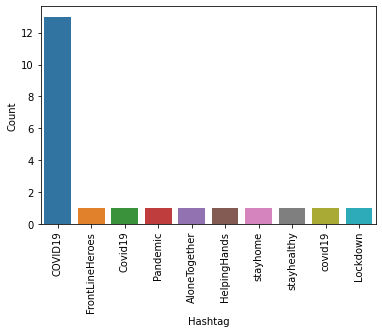

<Figure size 2304x720 with 0 Axes>

In [196]:
ax = sns.barplot(data = d,x = 'Hashtag',y = 'Count')
plt.figure(figsize=(32,10))
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
